## Week3 - Predictive Analytics project - Decision Tree_ Part2

### Chetan Kulkarni

#### Goal
The objective of this project is to extract the most informative features that could facilitate this process of determining the HUMIDITY in weather using Decision tree model.

This data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

Each row, or sample, consists of the following variables:

- number: unique number for each row
- air_pressure_9am: air pressure averaged over a period from 8:55am to 9:04am (Unit: hectopascals)
- air_temp_9am: air temperature averaged over a period from 8:55am to 9:04am (Unit: degrees Fahrenheit)
- air_wind_direction_9am: wind direction averaged over a period from 8:55am to 9:04am (Unit: degrees, with 0 means coming from the North, and increasing clockwise)
- air_wind_speed_9am: wind speed averaged over a period from 8:55am to 9:04am (Unit: miles per hour)
** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (Unit: degrees, with 0 being North and increasing clockwise)
- max_wind_speed_9am: wind gust speed averaged over a period from 8:55am to 9:04am (Unit: miles per hour)
- rain_accumulation_9am: amount of rain accumulated in the 24 hours prior to 9am (Unit: millimeters)
- rain_duration_9am: amount of time rain was recorded in the 24 hours prior to 9am (Unit: seconds)
- relative_humidity_9am: relative humidity averaged over a period from 8:55am to 9:04am (Unit: percent)
- relative_humidity_3pm: relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)

Import Libraries

In [60]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Read the Data

In [61]:
data = pd.read_csv("/Users/chetankulkarni/Documents/Python/daily_weather.csv")

In [62]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [63]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

### Explorotary Data Analysis

As part of EDA we will explore the data, find the data types, mean, mix, max of data perform data visualizations to find the data pattern

In [64]:
print(data.shape)
data.describe().transpose()

(1095, 11)


,count,mean,std,min,25%,50%,75%,max
number,1095.0,547.000000,316.243577,0.000000,273.500000,547.000000,820.500000,1094.000000
air_pressure_9am,1092.0,918.882551,3.184161,907.990000,916.550000,918.921045,921.160073,929.320000
air_temp_9am,1090.0,64.933001,11.175514,36.752000,57.281000,65.715479,73.450974,98.906000
avg_wind_direction_9am,1091.0,142.235511,69.137859,15.500000,65.972506,166.000000,191.000000,343.400000
avg_wind_speed_9am,1092.0,5.508284,4.552813,0.693451,2.248768,3.871333,7.337163,23.554978
max_wind_direction_9am,1092.0,148.953518,67.238013,28.900000,76.553003,177.300000,201.233153,312.200000
max_wind_speed_9am,1091.0,7.019514,5.598209,1.185578,3.067477,4.943637,8.947760,29.840780
rain_accumulation_9am,1089.0,0.203079,1.593952,0.000000,0.000000,0.000000,0.000000,24.020000
rain_duration_9am,1092.0,294.108052,1598.078779,0.000000,0.000000,0.000000,0.000000,17704.000000
relative_humidity_9am,1095.0,34.241402,25.472067,6.090000,15.092243,23.179259,45.400000,92.620000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
number                    1095 non-null int64
air_pressure_9am          1092 non-null float64
air_temp_9am              1090 non-null float64
avg_wind_direction_9am    1091 non-null float64
avg_wind_speed_9am        1092 non-null float64
max_wind_direction_9am    1092 non-null float64
max_wind_speed_9am        1091 non-null float64
rain_accumulation_9am     1089 non-null float64
rain_duration_9am         1092 non-null float64
relative_humidity_9am     1095 non-null float64
relative_humidity_3pm     1095 non-null float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [66]:
data.dtypes

number                      int64
air_pressure_9am          float64
air_temp_9am              float64
avg_wind_direction_9am    float64
avg_wind_speed_9am        float64
max_wind_direction_9am    float64
max_wind_speed_9am        float64
rain_accumulation_9am     float64
rain_duration_9am         float64
relative_humidity_9am     float64
relative_humidity_3pm     float64
dtype: object

Many variables are of either float or int, we can convert the target variable to binary classifier.

### Data cleaning and prepartion and Visualization

In [67]:
data_clean = data.copy()

In [68]:
data_clean.isnull().any().any()

True

In [69]:
data_clean.isna().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

#### Drop NA values

In [70]:
before_rows = data_clean.shape[0]
data_clean = data_clean.dropna()
after_rows = data_clean.shape[0]

In [71]:
print("The number of dropped rows are {}".format(before_rows - after_rows))

The number of dropped rows are 31


### Convert to a Classification Task 

Binarize the relative_humidity_3pm to 0 or 1.

We know that below 24 is low humidity and above 24 is high humidity. Below code creates a data frame that contains only those features that are used for predicting low humidity days. It then creates the target, a categorical variable to denote if humidity is not low. If the value is less than 25%, then the categorical value is 0, otherwise the categorical value is 1. Below plot shows how many less than 24 and greater than 24

In [72]:
data_clean['high_humidity'] = (data_clean['relative_humidity_3pm'] > 24) * 1 

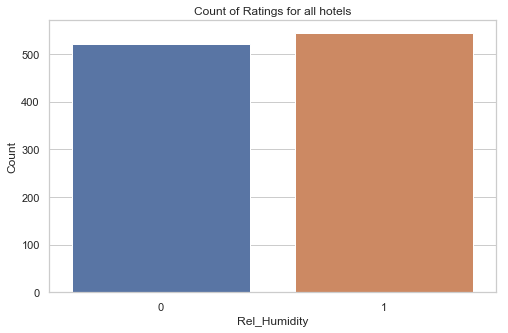

In [73]:
# plotting the benign and intrusion network calls
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
sns.countplot(data_clean['high_humidity'])
plt.xlabel("Rel_Humidity")
plt.ylabel("Count")
plt.title("Count of Ratings for all hotels")
plt.show()

### Target is now stored as y. Here, target is the label - 'high_humidity_label'

In [74]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

### Load Features and Targets

In [75]:
X = data_clean[morning_features].copy()
y = data_clean[['high_humidity']].copy()

### Split Train and Test Sets

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Transforming the Data

When building models it is usually good practice to scale your dataset in order to make the computations more efficient. In this step, you'll scale the data using the StandardScaler; this will ensure that your dataset values have a mean of zero and a unit variable.

This transforms the dataset to be normally distributed. You'll use the scikit-learn StandardScaler to scale the features to be within the same range. This will transform the values to have a mean of 0 and a standard deviation of 1. This step is important because you're comparing features that have different measurements; so it is typically required in machine learning.

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fit the DecisionTreeClassifier model

In [78]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Predict on Test Set 

In [79]:
predictions = humidity_classifier.predict(X_test)
predictions[:10]
y_test['high_humidity'][:10]

32      1
1084    1
423     1
767     1
818     1
583     1
594     1
606     1
87      0
421     1
Name: high_humidity, dtype: int64

### Measure Accuracy of the Classifier 

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))
accuracy_score(y_true = y_test, y_pred = predictions)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       162
           1       0.77      0.82      0.79       158

   micro avg       0.79      0.79      0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



0.790625

### Plot a ROC graph

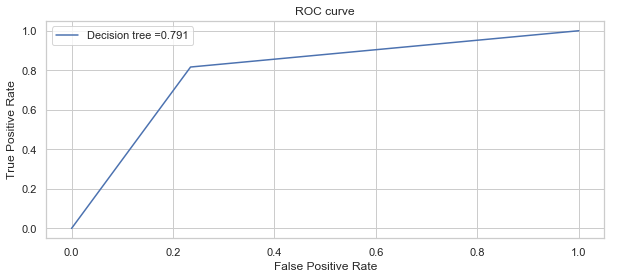

In [84]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,4))
fpr, tpr, thresholds = roc_curve(np.array(y_test).astype(int), predictions)
auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label="Decision tree =" + str(round(auc,3)),)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(b=True)
plt.legend()
plt.show()

### Plot a confusion Matrix

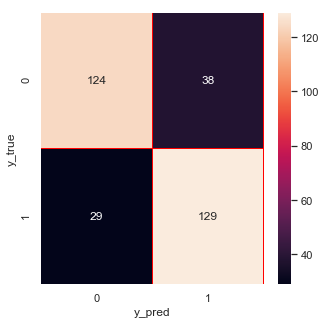

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Conclusion

- With confusion matrix we saw that our train and test datas balanced, so there is no problem in there.
- The Decision classifier hit 79% accuracy with this dataset. It is a decent score

Accuracy Measures of Classification Techniques with Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model or "classifier" on a set of test data for which the true values are known.

Confusion Matrix:

The classifier made a total of 124 and 129 as true positives and true negatives respectively. It predicted 29, 38 as false negatives and false positives respectively. 
 	Yes	No	 
High humidity 	124	38	Yes
No High humidity	29	129	No
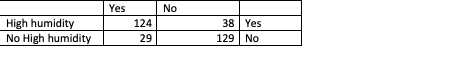
ROC curve : 
Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between detecting True Positives(Edible) with False Positives(poisonous). Here the score in 0.79 which is near to 1, Hence a good model prediction.